### ДАННЫЕ ДЛЯ АНАЛИЗА И ИХ ПОДГОТОВКА

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/Yulia/Untitled Folder/1_Cirrhosis Patient Survival Prediction.csv')
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [3]:
data.info()
#проверка на типы данных в столбцах таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### ПЕРВИЧНАЯ ПОДГОТОВКА, ПРЕОБРАЗОВАНИЕ И ОЧИСТКА ДАННЫХ

In [4]:
data[pd.isnull(data['Drug'])]
str106 = data[pd.isnull(data['Drug'])]
str106

# Итого: 9 столбцoв с отсутствующими значениями. Предполагаем, что лучше всего просто удалить все строки, 
# где эти столбцы не заполнены

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0
315,316,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
data = data.dropna(subset=['Drug']).copy()
#Удаление 106 строк без данных по столбцу Drug

data.isnull().sum()
#Проверка ячеек на оставшиеся NaN

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [6]:
data['Cholesterol'].fillna(value = data['Cholesterol'].median(), inplace = True)
data['Copper'].fillna(value = data['Copper'].median(), inplace = True)
data['Tryglicerides'].fillna(value = data['Tryglicerides'].median(), inplace = True)
data['Platelets'].fillna(value = data['Platelets'].median(), inplace = True)
#Замена NaN на медианные значения по оставшимся столбцам

data['Age']=(data['Age']/365).round(1)
# Перевод значений колонки "Age" в года

In [7]:
#Делаем дополнительную копию данных для дальнейшей работы
df = data.copy()

### ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ И ФИНАЛЬНАЯ ОБРАБОТКА ДАННЫХ

In [8]:
# Исследование по категориям относительно медицинского исхода

death = data.loc[data['Status'] == 'D']
life = data.loc[data['Status'] == 'C']
organ = data.loc[data['Status'] == 'CL']

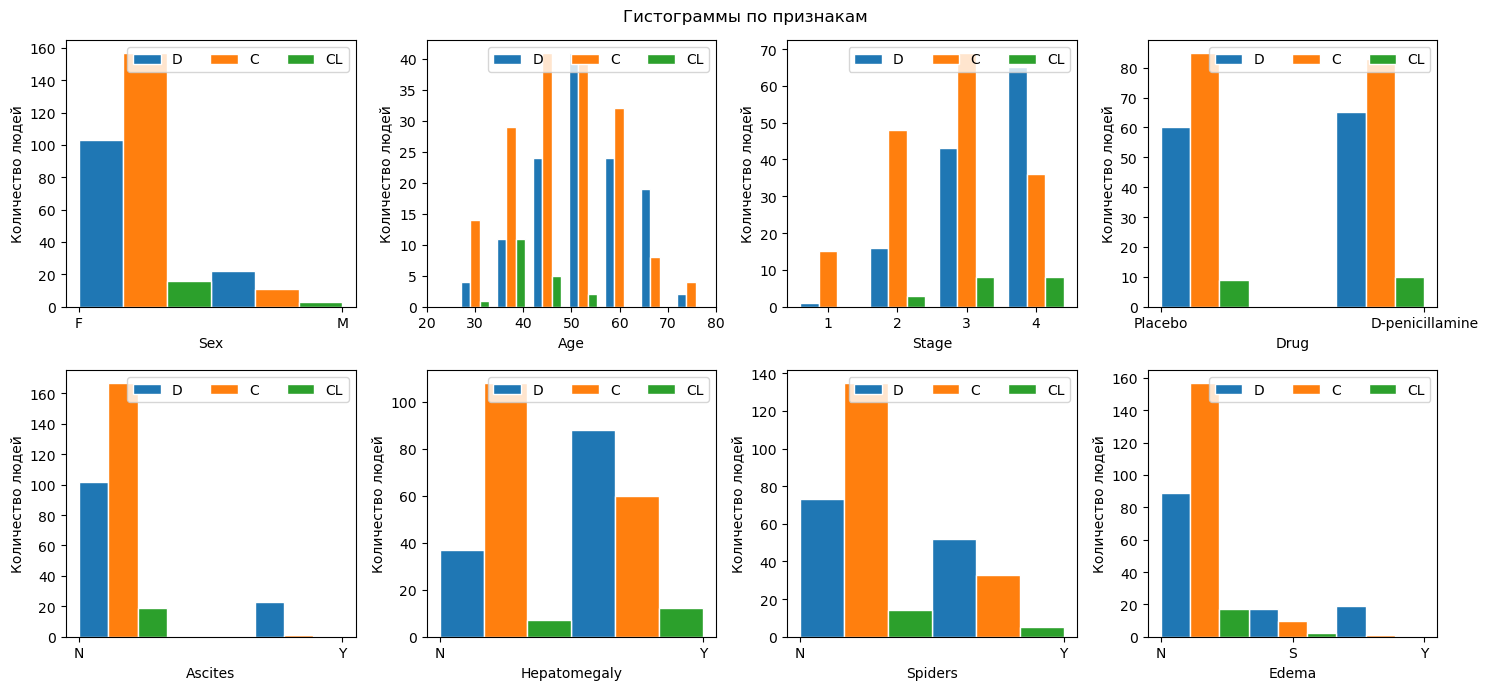

In [9]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(15, 7)

axs[0, 0].hist([death['Sex'], life['Sex'], organ['Sex']], bins=2, rwidth=1, align = 'mid', edgecolor="white", 
               label = ['D', 'C', 'CL'])
axs[0, 0].set_xlabel('Sex')
axs[0, 0].set_ylabel('Количество людей')
axs[0, 0].legend(loc='upper right', ncols = 3)

axs[0, 1].hist([death['Age'], life['Age'], organ['Age']], bins = 7, align = 'mid', edgecolor="white", label = ['D', 'C', 'CL'])
axs[0, 1].set_xlim(20, 80)
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Количество людей')
axs[0, 1].legend(loc='upper right', ncols = 3)

axs[0, 2].hist([death['Stage'], life['Stage'], organ['Stage']], range(1, 6), align = 'left', edgecolor="white",
               label = ['D', 'C', 'CL'])
axs[0, 2].set_xlabel('Stage')
axs[0, 2].set_ylabel('Количество людей')
axs[0, 2].legend(loc='upper right', ncols = 3)

axs[0, 3].hist([death['Drug'].sort_values(ascending=False), life['Drug'], organ['Drug']], bins=3, rwidth=1,
               align = 'mid', edgecolor="white", label = ['D', 'C', 'CL'])
axs[0, 3].set_xlabel('Drug')
axs[0, 3].set_ylabel('Количество людей')
axs[0, 3].legend(loc='upper right', ncols = 3)

axs[1, 0].hist([death['Ascites'].sort_values(), life['Ascites'], organ['Ascites']],
               bins=3, rwidth=1, align = 'mid', edgecolor="white", label = ['D', 'C', 'CL'])
axs[1, 0].set_xlabel('Ascites')
axs[1, 0].set_ylabel('Количество людей')
axs[1, 0].legend(loc='upper right', ncols = 3)

axs[1, 1].hist([death['Hepatomegaly'].sort_values(), life['Hepatomegaly'], organ['Hepatomegaly']],
               bins=2, rwidth=1, align = 'mid', edgecolor="white", label = ['D', 'C', 'CL'])
axs[1, 1].set_xlabel('Hepatomegaly')
axs[1, 1].set_ylabel('Количество людей')
axs[1, 1].legend(loc='upper right', ncols = 3)

axs[1, 2].hist([death['Spiders'].sort_values(), life['Spiders'], organ['Spiders']],
               bins=2, rwidth=1, align = 'mid', edgecolor="white", label = ['D', 'C', 'CL'])
axs[1, 2].set_xlabel('Spiders')
axs[1, 2].set_ylabel('Количество людей')
axs[1, 2].legend(loc='upper right', ncols = 3)

axs[1, 3].hist([death['Edema'].sort_values(), life['Edema'], organ['Edema']],
               bins=3, rwidth=1, edgecolor="white", label = ['D', 'C', 'CL'])
axs[1, 3].set_xlabel('Edema')
axs[1, 3].set_ylabel('Количество людей')
axs[1, 3].legend(loc='upper right', ncols = 3)

plt.suptitle('Гистограммы по признакам')
plt.tight_layout()
plt.show()

По визуализациям распределений видим, что:

•	 Данные по полам не сбалансированы – мужчины представлены в существенно меньшем количестве.

•	Трансплантация для людей старше 60 лет не проводилась, возможно в связи с ее неактуальностью из-за возрастных рисков.

•	Трансплантацию делают не ранее 2ой стадии заболевания, но наиболее целесообразно ее осуществление на 3 и 4 стадиях.

•	Стадия заболевания имеет прямое влияние на вероятность летального исхода, что логично.

•	Исходя из количественного распределения случаев, нельзя сказать, что наличие свободной жидкости в брюшной полости и капиллярных разрастаний однозначно влияет на вероятность летального исхода.

### КОНЕЧНОЕ ПРЕОБРАЗОВАНИЕ ДАННЫХ

In [10]:
def set_Sex(value):
    if value =='F':
        return 1
    else:
        return 0

data['Sex']=data['Sex'].apply(set_Sex)
df['Sex']=df['Sex'].apply(set_Sex)

In [11]:
def set_Drug(value):
    if value =='D-penicillamine':
        return 1
    else:
        return 0

data['Drug']=data['Drug'].apply(set_Drug)
df['Drug']=df['Drug'].apply(set_Drug)

In [12]:
def set_YN(value):
    if value =='Y':
        return 1
    else:
        return 0

data['Ascites']=data['Ascites'].apply(set_YN)
data['Hepatomegaly']=data['Hepatomegaly'].apply(set_YN)
data['Spiders']=data['Spiders'].apply(set_YN)

df['Ascites']=df['Ascites'].apply(set_YN)
df['Hepatomegaly']=df['Hepatomegaly'].apply(set_YN)
df['Spiders']=df['Spiders'].apply(set_YN)

In [13]:
data['Status'] = data['Status'].replace({'D':0, 'C': 1, 'CL': 2})
data['Edema'] = data['Edema'].replace({'N': 0, 'S': 1, 'Y':2})

df['Status'] = df['Status'].replace({'D':0, 'C': 1, 'CL': 2})
df['Edema'] = df['Edema'].replace({'N': 0, 'S': 1, 'Y':2})

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    int64  
 4   Age            312 non-null    float64
 5   Sex            312 non-null    int64  
 6   Ascites        312 non-null    int64  
 7   Hepatomegaly   312 non-null    int64  
 8   Spiders        312 non-null    int64  
 9   Edema          312 non-null    int64  
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    312 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         312 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    float64
 17  Platelets      312 non-null    float64
 18  Prothrombi

### СТАТИСТИЧЕСКОЕ ИССЛЕДОВАНИЕ ДАННЫХ

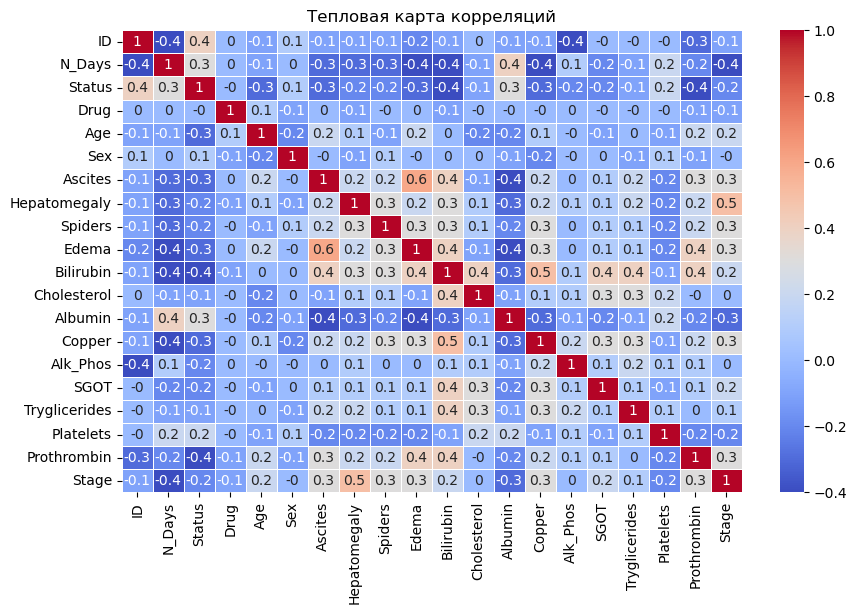

In [15]:
corr_matrix = data.corr().round(1)

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Тепловая карта корреляций');

In [16]:
import pingouin as pg 
import scipy.stats as stat
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter

In [17]:
# Разобьем данные на 2 группы: с вмешательством (с лечением) и контрольную (плацебо)
intervention = data[data['Drug'] == 1].copy()
control = data[data['Drug'] == 0]

Гендерное сравнение между группами
Drug  Sex
0     1      139
      0       15
1     1      137
      0       21
Name: Sex, dtype: int64


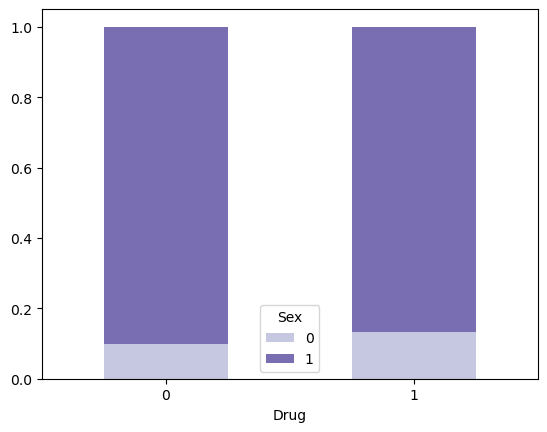

Статистически значимой разницы по полу между группами нет


test       pearson
lambda         1.0
chi2      0.646892
dof            1.0
pval      0.421226
cramer    0.045534
power     0.126761
Name: 0, dtype: object

In [18]:
print('Гендерное сравнение между группами')
print(data.groupby('Drug')['Sex'].value_counts())

gender_drug = data.groupby('Drug')['Sex'].value_counts(normalize = True)
gender_drug = gender_drug.unstack()
gender_drug.plot(kind = 'bar', stacked = True, color = sns.color_palette('Purples', 2))
plt.xticks(rotation = 0)
plt.show()

expected, observed, stats = pg.chi2_independence(data = data, x = 'Drug', y = 'Sex')
print('Статистически значимой разницы по полу между группами нет')
stats.iloc[0]

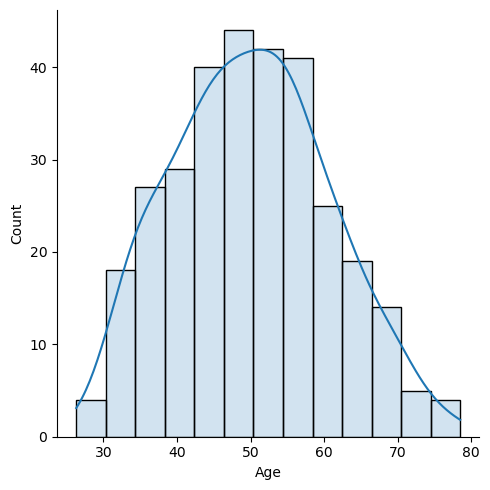

Данные о возрасте участников распределены ненормально
ShapiroResult(statistic=0.9899861812591553, pvalue=0.03117286041378975)


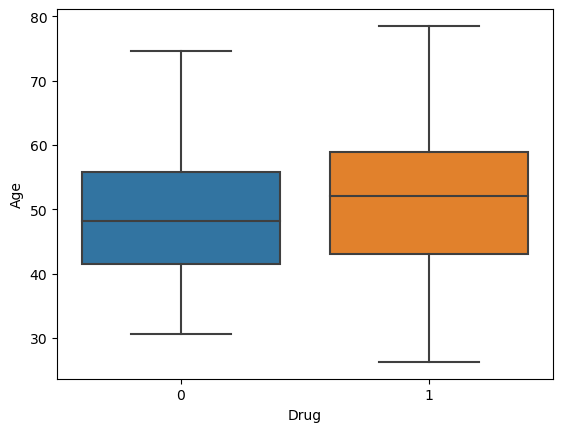

Сравнение медианного возраста между группами
Drug
0    48.15
1    52.00
Name: Age, dtype: float64


,U-val,alternative,p-val,RBC,CLES
MWU,14024.0,two-sided,0.019719,-0.152721,0.57636


In [19]:
sns.displot(data = data, x = 'Age', kind = 'hist', kde = True, fill = True, alpha = 0.2)
plt.show()
print('Данные о возрасте участников распределены ненормально')
print(stat.shapiro(data['Age']))

sns.boxplot(data = data, x = 'Drug', y = 'Age')
plt.show()

drug_age = pg.mwu(intervention['Age'], control['Age'], alternative = 'two-sided')
print('Сравнение медианного возраста между группами')
print(data.groupby('Drug')['Age'].median())
drug_age

Сравнение стадий цирроза печени между группами
Drug  Stage
0     3.0      64
      4.0      54
      2.0      32
      1.0       4
1     3.0      56
      4.0      55
      2.0      35
      1.0      12
Name: Stage, dtype: int64


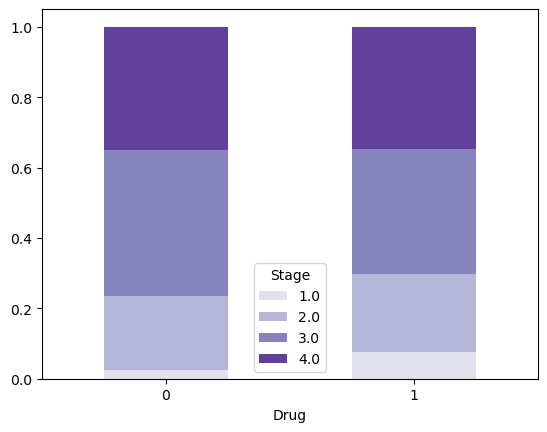

Статистически значимой разницы стадий цирроза между группами нет


test       pearson
lambda         1.0
chi2      4.626314
dof            3.0
pval      0.201296
cramer     0.12177
power     0.410278
Name: 0, dtype: object

In [20]:
print('Сравнение стадий цирроза печени между группами')
print(data.groupby('Drug')['Stage'].value_counts())

stage_drug = data.groupby('Drug')['Stage'].value_counts(normalize = True)
stage_drug = stage_drug.unstack()
stage_drug.plot(kind = 'bar', stacked = True, color = sns.color_palette('Purples', 4))
plt.xticks(rotation = 0)
plt.show()

expected, observed, stats = pg.chi2_independence(data = data, x = 'Drug', y = 'Stage')
print('Статистически значимой разницы стадий цирроза между группами нет')
stats.iloc[0]

Сравнение исходных показателей по свободной жидкости между группами
Drug  Ascites
0     0          144
      1           10
1     0          144
      1           14
Name: Ascites, dtype: int64


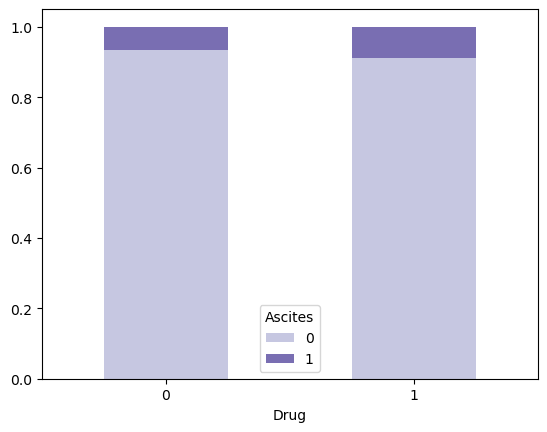

Статистически значимой разницы по асциту между группами нет


test       pearson
lambda         1.0
chi2      0.327244
dof            1.0
pval      0.567286
cramer    0.032386
power     0.088252
Name: 0, dtype: object

In [21]:
print('Сравнение исходных показателей по свободной жидкости между группами')
print(data.groupby('Drug')['Ascites'].value_counts())

ascites_drug = data.groupby('Drug')['Ascites'].value_counts(normalize = True)
ascites_drug = ascites_drug.unstack()
ascites_drug.plot(kind = 'bar', stacked = True, color = sns.color_palette('Purples', 2))
plt.xticks(rotation = 0)
plt.show()

expected, observed, stats = pg.chi2_independence(data = data, x = 'Drug', y = 'Ascites')
print('Статистически значимой разницы по асциту между группами нет')
stats.iloc[0]

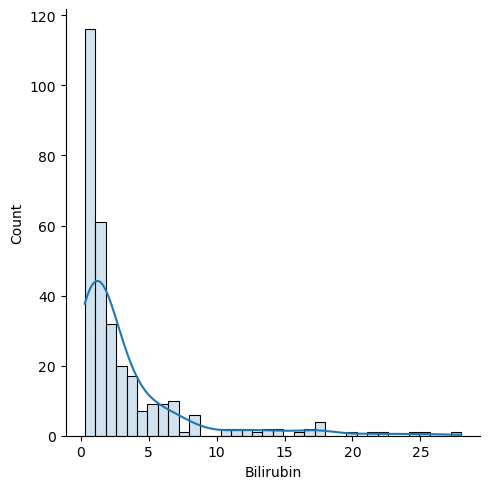

Данные о билирубине участников не подчиняются нормальному распределению
ShapiroResult(statistic=0.6213974952697754, pvalue=1.1559657091127276e-25)


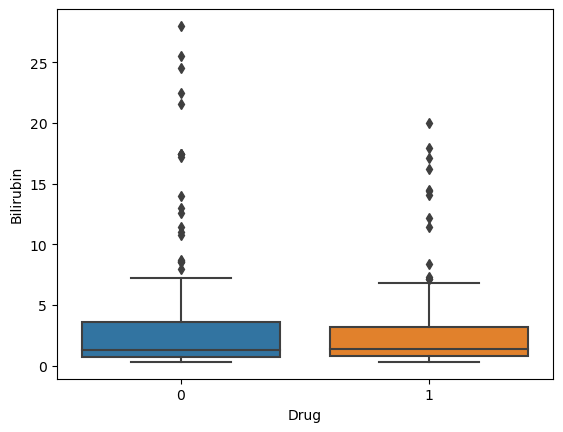

Сравнение медианного уровня билирубина между группами
Наблюдается значительное количество выбросов
Drug
0    1.3
1    1.4
Name: Bilirubin, dtype: float64


,U-val,alternative,p-val,RBC,CLES
MWU,12007.0,two-sided,0.842176,0.013069,0.493465


In [22]:
sns.displot(data = data, x = 'Bilirubin', kind = 'hist', kde = True, fill = True, alpha = 0.2)
plt.show()
print('Данные о билирубине участников не подчиняются нормальному распределению')
print(stat.shapiro(data['Bilirubin']))

sns.boxplot(data = data, x = 'Drug', y = 'Bilirubin')
plt.show()

drug_bilirubin = pg.mwu(intervention['Bilirubin'], control['Bilirubin'], alternative = 'two-sided')
print('Сравнение медианного уровня билирубина между группами')
print('Наблюдается значительное количество выбросов')
print(data.groupby('Drug')['Bilirubin'].median())
drug_bilirubin

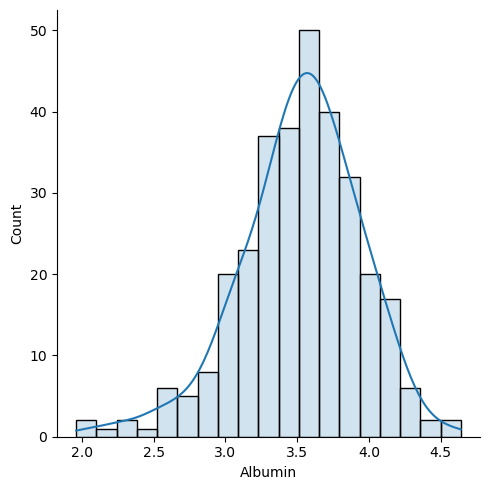

Данные об альбумине участников распределены ненормально
ShapiroResult(statistic=0.9798900485038757, pvalue=0.00022951935534365475)


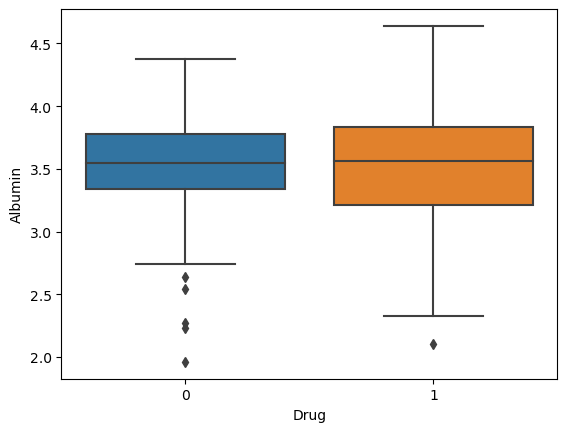

Сравнение медианного значения альбумина между группами
Drug
0    3.545
1    3.565
Name: Albumin, dtype: float64


,U-val,alternative,p-val,RBC,CLES
MWU,12116.5,two-sided,0.950952,0.004069,0.497966


In [23]:
sns.displot(data = data, x = 'Albumin', kind = 'hist', kde = True, fill = True, alpha = 0.2)
plt.show()
print('Данные об альбумине участников распределены ненормально')
print(stat.shapiro(data['Albumin']))

sns.boxplot(data = data, x = 'Drug', y = 'Albumin')
plt.show()

drug_albumin = pg.mwu(intervention['Albumin'], control['Albumin'], alternative = 'two-sided')
print('Сравнение медианного значения альбумина между группами')
print(data.groupby('Drug')['Albumin'].median())
drug_albumin

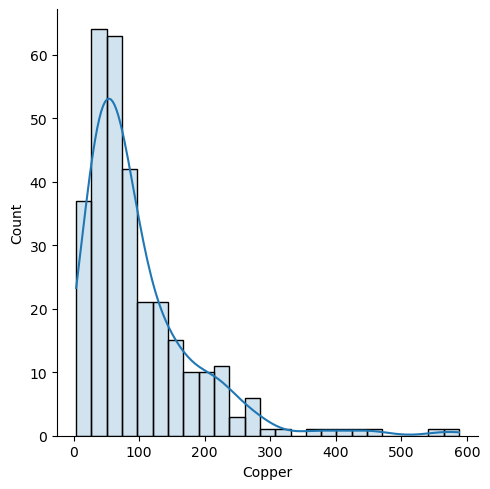

Данные по анализам на медь не подчиняютмя нормальному распределению
ShapiroResult(statistic=0.7864218950271606, pvalue=6.503995140708013e-20)


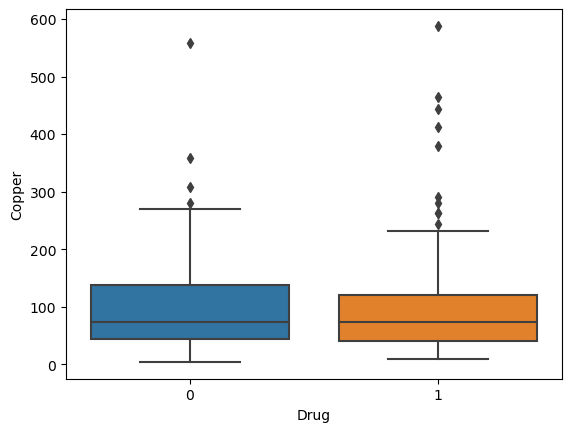

Сравнение медианного уровня меди между группами
Drug
0    73.0
1    73.0
Name: Copper, dtype: float64


,U-val,alternative,p-val,RBC,CLES
MWU,11882.0,two-sided,0.721928,0.023344,0.488328


In [24]:
sns.displot(data = data, x = 'Copper', kind = 'hist', kde = True, fill = True, alpha = 0.2)
plt.show()
print('Данные по анализам на медь не подчиняютмя нормальному распределению')
print(stat.shapiro(data['Copper']))

sns.boxplot(data = data, x = 'Drug', y = 'Copper')
plt.show()

drug_copper = pg.mwu(intervention['Copper'], control['Copper'], alternative = 'two-sided')
print('Сравнение медианного уровня меди между группами')
print(data.groupby('Drug')['Copper'].median())
drug_copper

По результатам статистического исследования в разрезе групп пациентов, принимавших лекарство и получавших плацебо, можно сделать следующие выводы:

1. Количественные признаки не подчиняются нормальному распределению (тест Шапиро pvalue меньше уровня значимости равного 0.05)

2. Существенной корреляции (> 0.7) между признаками не обнаружено.

3. Наличие выбросов по отдельным признакам обусловлено клиническими показателями течения заболевания, но в целом их присутствие не оказывает существенного влияния на оценку совокупности данных.

4. Медианные показатели количественных признаков принимавших и не принимавших лекарство пациентов примерно одинаковы

5. Хотя мужчины представлены в существенно меньшем количестве, но демонстрируют аналогичную женщинам выживаемость.

6. Статистически значимой разницы по стадиям цирроза в зависимости от приема препарата также не наблюдается. 

7. Количество принимавших и не принимавших лекарство пациентов одинаково, распределение исходов также приблизительно совпадает.

В связи с чем можно сделать предварительный вывод, что Д-пеницилламин не обладает доказанной эффективностью в лечении цирроза печени из-за отсутствия статистических различий между группами, принимавшими и не принимавшими препарат (ориентируемся на pvalue критерия Пирсона – он больше уровня значимости равного 0.05).

### СПЕЦИФИЧЕСКИЕ АНАЛИТИЧЕСКИЕ ИССЛЕДОВАНИЯ

In [25]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,1,58.8,1,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,1,56.5,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,1,70.1,0,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,1,54.8,1,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,2,0,38.1,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,1,1,61.2,1,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,1,0,58.3,1,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,1,1,62.4,1,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,1,1,38.0,1,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [26]:
df.groupby('Status')['ID'].count()

Status
0    125
1    168
2     19
Name: ID, dtype: int64

In [27]:
# data['Status'] = data['Status'].replace({'C': 1, 'CL': 2, 'D':0})
df['Status'] = df['Status'].replace(2,1)

In [28]:
df.groupby('Status')['ID'].count()

Status
0    125
1    187
Name: ID, dtype: int64

In [29]:
df.loc[df['Status'] == 0, 'Status'] = 0
df.loc[df['Status'] == 1, 'Status'] = 1

In [30]:
# переводим дни в года: с момента обнаружения до события - смерти, трансплантации или времени подготовки данных
df['N_Days'] = (df['N_Days'] / 365).round(0)
df = df.rename(columns = {'N_Days':'N_Years'})

### Метод Каплан-Мейера

Кривые выживаемости показывают, что на горизонте четырех лет прием лекарства не оказывает поддерживающего влияния в сравнении с результатами контрольной группы. Но с течением времени и, видимо, ухудшением клинической картины его действие демонстрирует эффективность относительно плацебо – это участок с 4 до 8 лет. У пациентов, живущих с диагнозом более 8 лет, прием лекарства также не имеет значительного терапевтического эффекта. После 10 лет жизни с диагностированным циррозом печени использование лекарственного препарата имеет некоторый поддерживающий эффект.

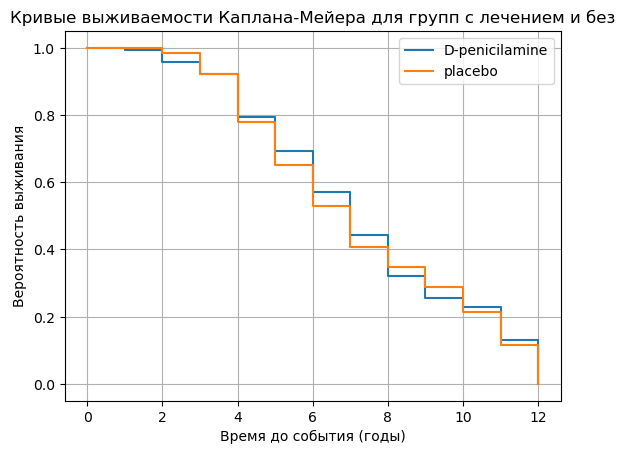

In [31]:
time = df['N_Years']
event = df['Status']

intervention_group = (df['Drug'] == 1)
control_group = (df['Drug'] == 0)

km = KaplanMeierFitter()
km.fit(time[intervention_group], event[intervention_group], label = 'D-penicilamine')
ax = km.plot(ci_show = False)

km.fit(time[control_group], event[control_group], label = 'placebo')
km.plot(ax = ax, ci_show = False)

plt.title('Кривые выживаемости Каплана-Мейера для групп c лечением и без')
plt.xlabel('Время до события (годы)')
plt.ylabel('Вероятность выживания')
plt.grid(True)
plt.show()

### Метод пропорциональных рисков Кокса

Отношение рисков выше 1 указывает на ковариату, которая положительно связана с вероятностью события и, следовательно, отрицательно связана с продолжительностью жизни.

HR = 1: нет эффекта, HR < 1: снижение опасности, HR > 1: увеличение опасности


exp(coef) - это коэффициент риска


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Drug,-0.104976,0.900346,0.154978,-0.408727,0.198776,0.664495,1.219908,0.0,-0.677359,4.981785e-01,1.005265
Age,-0.012951,0.987132,0.008558,-0.029725,0.003822,0.970713,1.003829,0.0,-1.513352,1.301903e-01,2.941306
Sex,0.239940,1.271173,0.316684,-0.380748,0.860629,0.683350,2.364647,0.0,0.757666,4.486507e-01,1.156335
Ascites,-1.182726,0.306442,1.026605,-3.194835,0.829382,0.040973,2.291903,0.0,-1.152075,2.492901e-01,2.004103
Bilirubin,0.079278,1.082505,0.039645,0.001575,0.156981,1.001576,1.169973,0.0,1.999686,4.553415e-02,4.456907
Cholesterol,-0.000661,0.999340,0.000588,-0.001814,0.000493,0.998188,1.000493,0.0,-1.122607,2.616046e-01,1.934540
Albumin,-0.628411,0.533439,0.252847,-1.123983,-0.132839,0.324983,0.875606,0.0,-2.485337,1.294287e-02,6.271698
Copper,0.002227,1.002230,0.001374,-0.000467,0.004921,0.999534,1.004933,0.0,1.620474,1.051306e-01,3.249746
Alk_Phos,-0.000301,0.999699,0.000053,-0.000406,-0.000197,0.999594,0.999803,0.0,-5.661156,1.503563e-08,25.987040


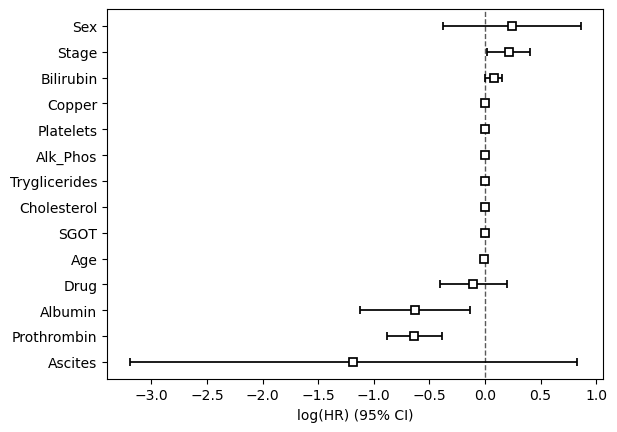

In [32]:
cirrhosis = df.drop(['ID', 'Hepatomegaly', 'Spiders', 'Edema'], axis = 1)
cirrhosis.loc[cirrhosis['Drug'] == '1', 'Drug'] = 1
cirrhosis.loc[cirrhosis['Drug'] == '0', 'Drug'] = 0


cirrhosis.loc[cirrhosis['Sex'] == '1', 'Sex'] = 1
cirrhosis.loc[cirrhosis['Sex'] == '0', 'Sex'] = 0

cirrhosis.loc[cirrhosis['Ascites'] == '1', 'Ascites'] = 1
cirrhosis.loc[cirrhosis['Ascites'] == '0', 'Ascites'] = 0

cox = CoxPHFitter()
cox.fit(cirrhosis, 'N_Years', event_col = 'Status')
print('exp(coef) - это коэффициент риска')
cox.plot()
cox.summary

### ВЫБОР ПРЕДСКАЗАТЕЛЬНОЙ (ПРЕДИКТИВНОЙ) МОДЕЛИ

In [33]:
cs = df[['N_Years', 'Sex', 'Status', 'Stage', 'Prothrombin', 'Bilirubin', 'Age', 'Albumin']]
cs

,N_Years,Sex,Status,Stage,Prothrombin,Bilirubin,Age,Albumin
0,1.0,1,0,4.0,12.2,14.5,58.8,2.60
1,12.0,1,1,3.0,10.6,1.1,56.5,4.14
2,3.0,0,0,4.0,12.0,1.4,70.1,3.48
3,5.0,1,0,4.0,10.3,1.8,54.8,2.54
4,4.0,1,1,3.0,10.9,3.4,38.1,3.53
...,...,...,...,...,...,...,...,...
307,3.0,1,1,2.0,10.4,0.4,61.2,3.58
308,3.0,1,1,2.0,10.8,0.4,58.3,2.75
309,3.0,1,1,2.0,10.2,1.7,62.4,3.35
310,2.0,1,1,2.0,10.5,2.0,38.0,3.16


**Для первичного теста решено было выбрать пациентов, которые выжили после первого года наблюдения, и участников, умерших в течение этого периода.**

In [34]:
survive = cs[(cs['N_Years'] >= 1) & (cs['Status'] == 1)]
death = cs[(cs['N_Years'] < 1) & (cs['Status'] == 0)]
oneyear_survive = pd.concat([survive, death], axis = 0)
oneyear_survive

,N_Years,Sex,Status,Stage,Prothrombin,Bilirubin,Age,Albumin
1,12.0,1,1,3.0,10.6,1.1,56.5,4.14
4,4.0,1,1,3.0,10.9,3.4,38.1,3.53
6,5.0,1,1,3.0,9.7,1.0,55.6,4.09
12,10.0,1,1,3.0,10.6,0.7,45.7,3.85
15,10.0,1,1,3.0,10.8,0.7,40.5,3.66
...,...,...,...,...,...,...,...,...
94,0.0,1,0,2.0,11.7,17.4,46.4,2.64
102,0.0,1,0,4.0,11.1,2.5,49.0,3.67
153,0.0,0,0,3.0,14.1,2.4,69.4,2.56
266,0.0,1,0,4.0,12.1,6.6,71.0,2.33


In [35]:
oneyear_survive['Status'].value_counts()

1    187
0      9
Name: Status, dtype: int64

In [36]:
oneyear_survive['Status'] = oneyear_survive['Status'].astype('int')
oneyear_survive.dtypes

N_Years        float64
Sex              int64
Status           int32
Stage          float64
Prothrombin    float64
Bilirubin      float64
Age            float64
Albumin        float64
dtype: object

In [37]:
# ИНСТРУМЕНТЫ ПРЕДВАРИТЕЛЬНОЙ ОБРАБОТКИ
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder

# СРЕДСТВА ОБУЧЕНИЯ ПОД КОНТРОЛЕМ
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import xgboost as xgb
from sklearn import tree

# СРЕДСТВА ОБУЧЕНИЯ БЕЗ КОНТРОЛЯ
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

In [38]:
# разделение данных

X = oneyear_survive.drop(['N_Years', 'Status'], axis = 1)
y = oneyear_survive['Status']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify = y, test_size = 0.3, random_state = 123)

In [39]:
# масштабирование функций

scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# перекрестная проверка

kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [41]:
logreg = LogisticRegression()
params = {'C' : np.linspace(0.001, 10, 5)} #управляет обратной силой регуляризации. Большое значение может привести к переобучению, а маленькое - к недостаточному соответствию.

logreg_cv = GridSearchCV(logreg, param_grid = params, cv = kf)
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print('best cross validation accuracy score :', logreg_cv.best_score_)

logreg_best = logreg_cv.best_estimator_
print('best model accuracy score for test set :', logreg_best.score(X_test, y_test))

{'C': 2.50075}
best cross validation accuracy score : 0.9637566137566136
best model accuracy score for test set : 0.9830508474576272


In [42]:
logreg_best.fit(X_train, y_train)
y_pred = logreg_best.predict(X_test)
y_pred_probs = logreg_best.predict_proba(X_test)[:, 1]
np.round(y_pred_probs, 2)

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 0.85, 1.  , 1.  , 0.99,
       1.  , 1.  , 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.51, 1.  ,
       1.  , 0.99, 0.88, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.99, 1.  , 1.  , 1.  , 1.  , 0.98, 1.  , 1.  , 0.99, 0.99, 1.  ,
       0.96, 1.  , 0.46, 1.  , 0.99, 1.  , 1.  , 1.  , 0.03, 0.96, 1.  ,
       1.  , 1.  , 1.  , 1.  ])

Выборка получилась не совсем сбалансированная по количеству. Но точность модели логистической регрессии достаточно большая. Скорее всего она будет хорошо предсказывать выживаемость на горизонте после одного года, но не сработает на показателях тех, кто имеет высокий риск смертности в рамках 12 месяцев.

Далее возвращаемся к построению моделей с использованием всех предиктивных признаков вне зависимости от временного горизонта выживаемости.

#### K-NEIGHBOURS ####

In [43]:
kn=data.copy()

kn['Stage'] = kn['Stage'].astype(str)

In [44]:
kn['Stage'].replace({'1.0':'1_Stage','2.0':'2_Stage','3.0':'3_Stage','4.0':'4_Stage'}, inplace = True)
kn['Edema'].replace({0:'N',1:'S',2:'Y'}, inplace = True)

In [45]:
kn[pd.get_dummies(kn['Edema']).columns]=pd.get_dummies(kn['Edema'])
kn[pd.get_dummies(kn['Stage']).columns]=pd.get_dummies(kn['Stage'])
kn=kn.drop(['Edema','Stage'], axis=1)
kn.head()
# data['Edema'] = data['Edema'].replace({'N': 0, 'S': 1, 'Y':2})

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,...,Tryglicerides,Platelets,Prothrombin,N,S,Y,1_Stage,2_Stage,3_Stage,4_Stage
0,1,400,0,1,58.8,1,1,1,1,14.5,...,172.0,190.0,12.2,0,0,1,0,0,0,1
1,2,4500,1,1,56.5,1,0,1,1,1.1,...,88.0,221.0,10.6,1,0,0,0,0,1,0
2,3,1012,0,1,70.1,0,0,0,0,1.4,...,55.0,151.0,12.0,0,1,0,0,0,0,1
3,4,1925,0,1,54.8,1,0,1,1,1.8,...,92.0,183.0,10.3,0,1,0,0,0,0,1
4,5,1504,2,0,38.1,1,0,1,1,3.4,...,72.0,136.0,10.9,1,0,0,0,0,1,0


In [46]:
kn['N']=kn['N'].apply(int)
kn['S']=kn['S'].apply(int)
kn['Y']=kn['Y'].apply(int)

In [47]:
kn['1_Stage']=kn['1_Stage'].apply(int)
kn['2_Stage']=kn['2_Stage'].apply(int)
kn['3_Stage']=kn['3_Stage'].apply(int)
kn['4_Stage']=kn['4_Stage'].apply(int)

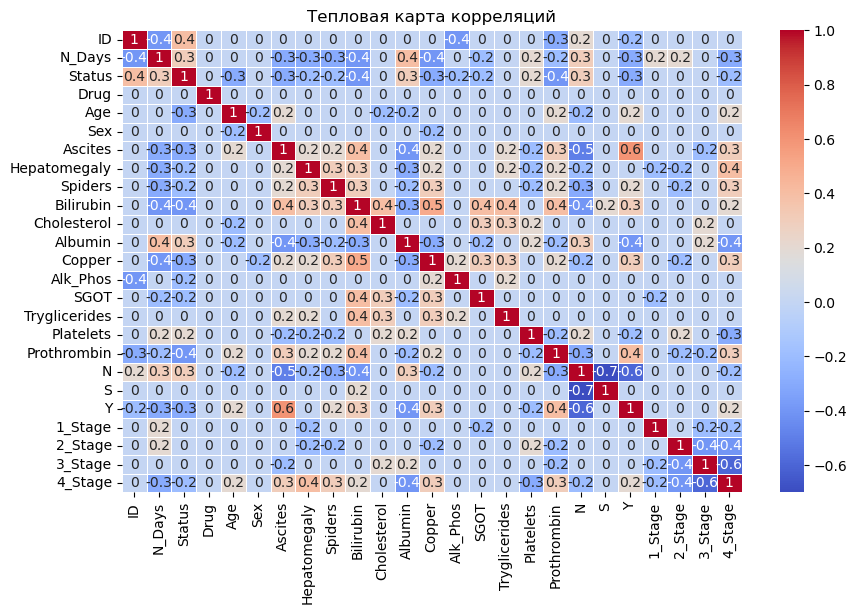

In [48]:
cm = kn.corr().round(1)
cm[np.abs(cm) < 0.2] = 0

plt.figure(figsize=(10, 6))

sns.heatmap(cm, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Тепловая карта корреляций');

In [49]:
x = kn.drop('Status', axis=1)
y = kn['Status']

In [50]:
#Разбиение исходного набора данных на выборки для обучения и тестирования модели

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(X_train)

249

In [51]:
#Метод стандартизации значений
scaler = StandardScaler()

#получение обучающих данных
X_train_scaled = scaler.fit_transform(X_train)

#получение тестовых данных
X_test_scaled = scaler.transform(X_test)

In [52]:
#создание классификатора (значение n_neighbors желательно должно быть нечетным)
classifier = KNeighborsClassifier()

In [53]:
#обучение модели, метод fit() подбирает признаки из набора обучащих данных
param_grid = {'n_neighbors': range(1, 50)}
grid = GridSearchCV(classifier, param_grid, cv = 5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [54]:
print('Best Parameter: %s' % grid.best_params_)
print('Best Score: %s' % grid.best_score_)

Best Parameter: {'n_neighbors': 25}
Best Score: 0.7306122448979592


In [55]:
#предсказание
grid_prediction = grid.predict(X_test_scaled)

In [56]:
#точность предсказания
print(accuracy_score(y_test, grid_prediction))
print(precision_score(y_test, grid_prediction, average='weighted'))

0.7777777777777778
0.7585470085470086


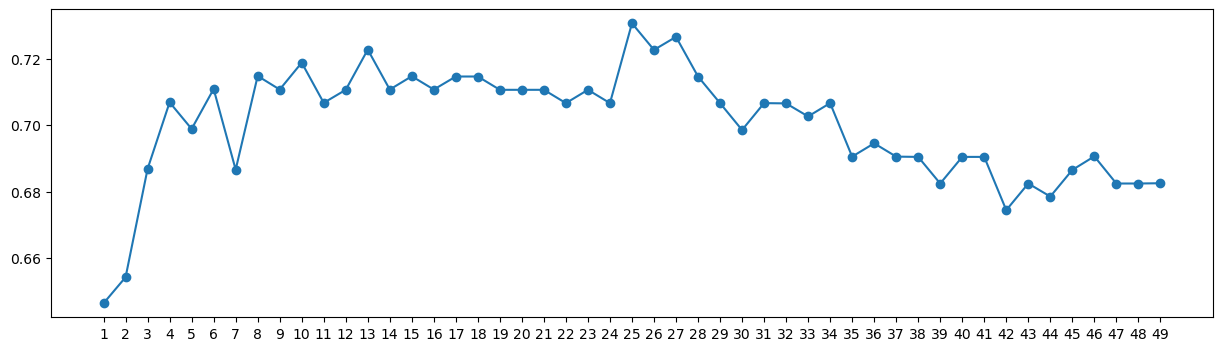

In [57]:
all_scores = grid.cv_results_['mean_test_score']
plt.figure(figsize = (15,4))
plt.plot(range(1,50), all_scores, 'o-')
plt.xticks(range(1,50))
plt.rcParams['figure.figsize'] = [25,4]
plt.show()

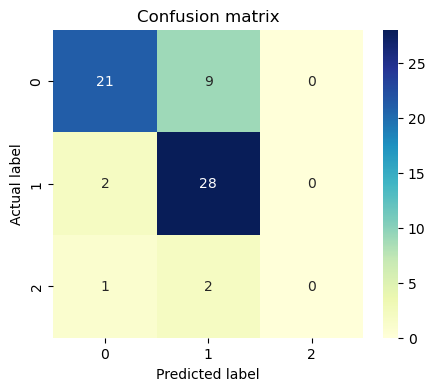

In [58]:
#матрица предсказанных значений для оценки точности прогноза
conf_matrix = confusion_matrix(y_test, grid_prediction)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
clf_report = classification_report(y_test, grid_prediction)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.72      0.93      0.81        30
           2       0.00      0.00      0.00         3

    accuracy                           0.78        63
   macro avg       0.53      0.54      0.53        63
weighted avg       0.76      0.78      0.76        63



### ПРОЧИЕ МЕТОДЫ КЛАССИФИКАЦИИ ###

In [60]:
data = data.drop(['ID'],axis = 1)
data['Stage'] = data['Stage'].astype(int)

In [61]:
def scale_columns_with_minmax(data, columns, feature_range=(-1, 1)):
    scaler = MinMaxScaler(feature_range=feature_range)
    data[columns] = scaler.fit_transform(data[columns])
    return data

columns_to_scale = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
                    'Tryglicerides', 'Platelets', 'Prothrombin']

data = scale_columns_with_minmax(data, columns_to_scale, feature_range=(-1, 1))

In [62]:
def encode_categorical_columns(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

columns_to_encode = ['Status','Stage']
data = encode_categorical_columns(data, columns_to_encode)

In [63]:
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,1,58.8,1,1,1,1,2,0.025271,-0.829607,-0.522388,-0.479452,-0.789441,-0.482014,-0.507965,-0.489022,-0.209877,3
1,4500,1,1,56.5,1,0,1,1,0,-0.942238,-0.780060,0.626866,-0.828767,0.047018,-0.595405,-0.805310,-0.365269,-0.604938,2
2,1012,0,1,70.1,0,0,0,0,1,-0.920578,-0.932326,0.134328,-0.294521,-0.966552,-0.676259,-0.922124,-0.644711,-0.259259,3
3,1925,0,1,54.8,1,0,1,1,1,-0.891697,-0.850151,-0.567164,-0.794521,-0.140554,-0.840891,-0.791150,-0.516966,-0.679012,3
4,1504,2,0,38.1,1,0,1,1,0,-0.776173,-0.807855,0.171642,-0.523973,-0.943713,-0.597122,-0.861947,-0.704591,-0.530864,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,1,1,61.2,1,0,1,0,0,-0.992780,-0.847734,0.208955,-0.931507,-0.925148,-0.699930,-0.716814,-0.097804,-0.654321,1
308,994,1,0,58.3,1,0,0,0,0,-0.992780,-0.830816,-0.410448,-0.873288,-0.870777,-0.797401,-0.826549,-0.325349,-0.555556,1
309,939,1,1,62.4,1,0,0,0,0,-0.898917,-0.620544,0.037313,-0.880137,-0.790178,-0.328615,-0.762832,-0.313373,-0.703704,1
310,839,1,1,38.0,1,0,0,0,0,-0.877256,-0.846526,-0.104478,-0.777397,-0.887869,-0.579253,-0.805310,0.089820,-0.629630,1


In [64]:
X = data.drop(['Status'], axis = 1)
Y = data['Status']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 1)

In [66]:
RForest_clf = RandomForestClassifier(n_estimators = 100)
RForest_clf.fit(X_train, y_train)
y_pred = RForest_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 73.07692307692307


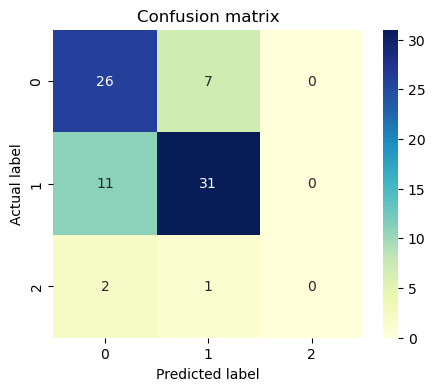

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix - random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 75.64102564102564


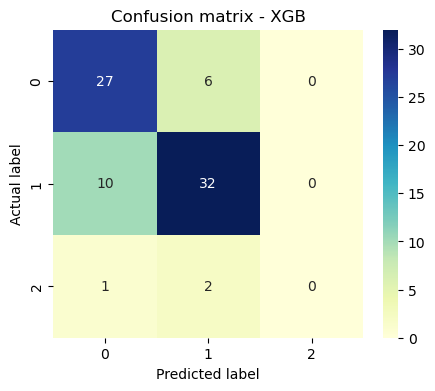

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix - XGB')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 74.35897435897436


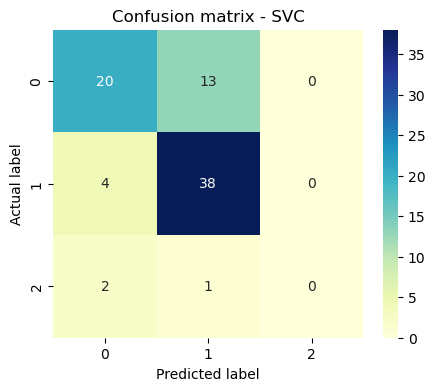

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix - SVC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 73.07692307692307


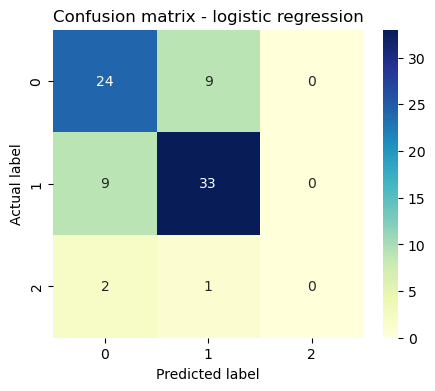

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix - logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [75]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 66.66666666666666


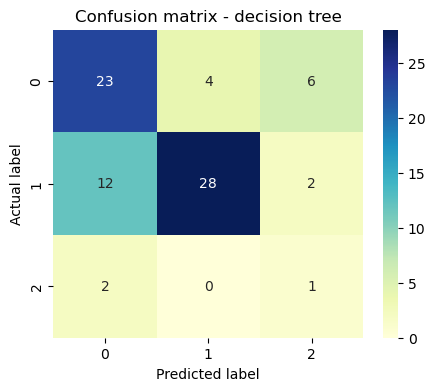

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap ='YlGnBu', fmt = 'g')
plt.title('Confusion matrix - decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy for Logistic Regression: 0.73
Accuracy for Random Forest: 0.76
Accuracy for Support Vector Machine: 0.74
Accuracy for XGBoost: 0.76
Accuracy for Decision Tree: 0.69


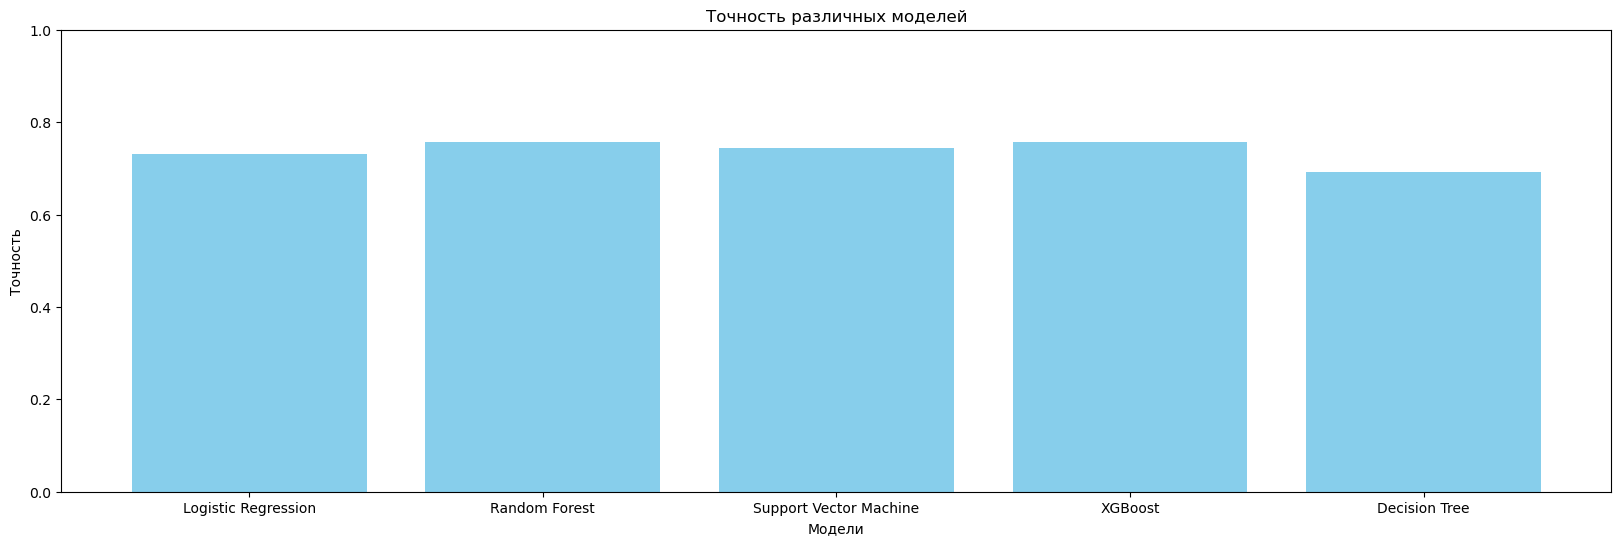

In [77]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest' :  RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'XGBoost' : xgb.XGBClassifier(),
    'Decision Tree' : tree.DecisionTreeClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

plt.figure(figsize=(20, 6)) 
plt.bar(models.keys(), accuracies, color='skyblue') 
plt.xlabel('Модели') 
plt.ylabel('Точность') 
plt.title('Точность различных моделей') 
plt.ylim([0, 1]) 
plt.show()

### ПРИМЕР ПРОГНОЗА ПО КЛИНИЧЕСКИМ ДАННЫМ ПАЦИЕНТА

In [78]:
from sklearn.tree import plot_tree

In [79]:
model_class= DecisionTreeClassifier(random_state=45, #зерно датчика случайных чисел
                                    criterion='gini', #критерий разбиения вершины
                                    max_depth=5, #максимальная глубина дерева
                                    min_samples_split=5, #минимальное число наблюдений в ноде для разбиения
                                    min_samples_leaf=5, #минимальное число наблюдений в конечных узлах
                                    class_weight=None #веса для классов, поддерживает опцию 'balanced'
                                    )
model_class.fit(X,Y) 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=45)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= 1214.0\ngini = 0.546\nsamples = 312\nvalue = [125, 168, 19]'),
 Text(0.18181818181818182, 0.75, 'x[16] <= -0.543\ngini = 0.322\nsamples = 80\nvalue = [65, 7, 8]'),
 Text(0.09090909090909091, 0.5833333333333334, 'x[17] <= 1.5\ngini = 0.616\nsamples = 29\nvalue = [15, 7, 7]'),
 Text(0.045454545454545456, 0.4166666666666667, 'gini = 0.494\nsamples = 9\nvalue = [2, 6, 1]'),
 Text(0.13636363636363635, 0.4166666666666667, 'x[12] <= -0.87\ngini = 0.485\nsamples = 20\nvalue = [13, 1, 6]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.18181818181818182, 0.25, 'x[10] <= -0.086\ngini = 0.338\nsamples = 15\nvalue = [12, 1, 2]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(0.22727272727272727, 0.08333333333333333, 'gini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[13] <= -0.741\ngini = 0.038\nsampl

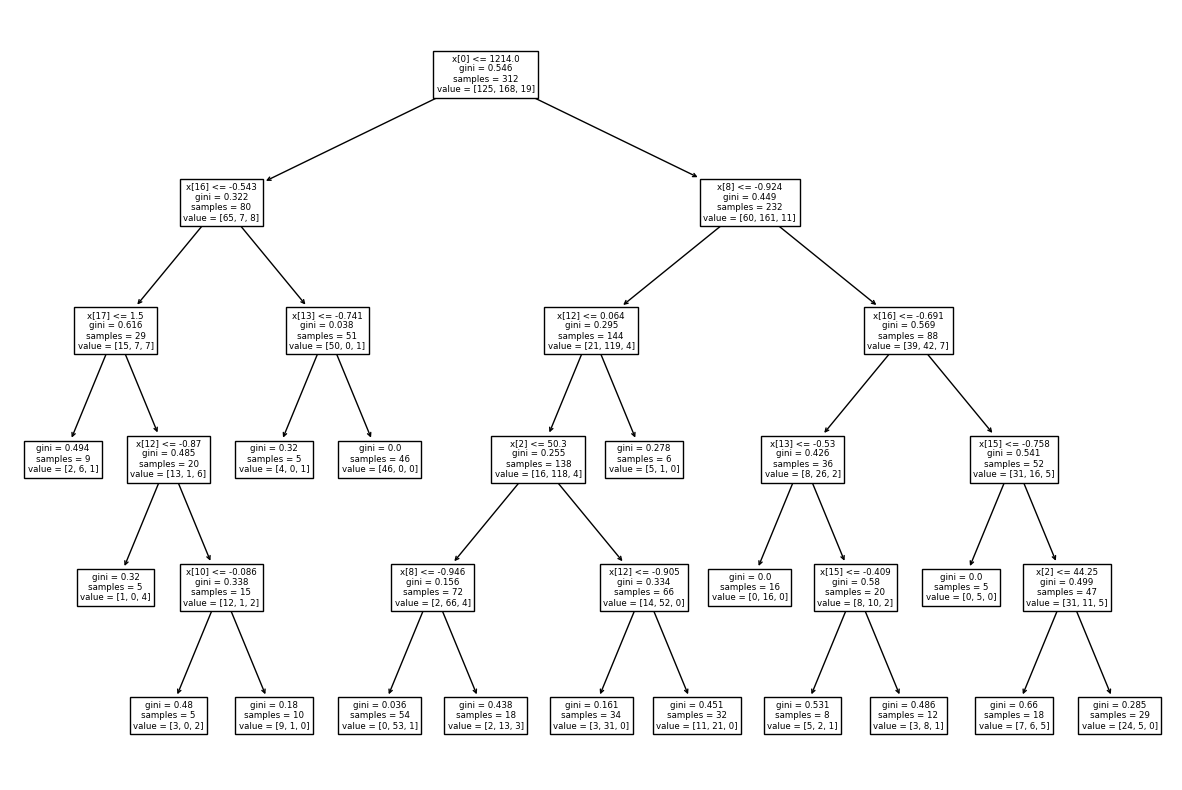

In [80]:
plt.figure(figsize=(15, 10))
plot_tree(model_class)

In [81]:
pd.DataFrame({'column':model_class.feature_names_in_,
             'importance':model_class.feature_importances_}) 
#оцениваем влияние признаков

,column,importance
0,N_Days,0.416332
1,Drug,0.000000
2,Age,0.053002
3,Sex,0.000000
4,Ascites,0.000000
5,Hepatomegaly,0.000000
6,Spiders,0.000000
7,Edema,0.000000
8,Bilirubin,0.134357
9,Cholesterol,0.000000


In [82]:
test=pd.read_csv('C:/Users/Yulia/Untitled Folder/test_cirrhosis.csv')
test

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,4000,1,1,41.4,1,0,1,1,0,1.3,305,4.10,49,7300.8,110.52,83,213,10.2,3
1,2,3865,1,0,52.0,0,0,1,1,0,0.3,248,3.80,45,839.0,62.10,84,331,11.4,4
2,3,4091,0,1,44.5,1,0,1,0,0,2.2,458,6.00,121,5723.0,222.83,231,72,9.3,2
3,4,3068,0,0,63.3,1,0,0,0,0,0.7,209,3.25,84,1589.0,216.53,112,183,10.0,3
4,5,2543,2,0,46.2,1,0,1,0,0,1.1,321,3.60,72,1165.0,143.25,134,242,9.6,4
5,6,4344,1,0,38.9,0,0,0,0,0,0.3,211,3.92,23,605.0,58.45,182,209,12.0,1


In [83]:
# используем функции для нормализации и энкодинга
test = scale_columns_with_minmax(test, columns_to_scale, feature_range=(-1, 1))
test = encode_categorical_columns(test, columns_to_encode)
test

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,4000,1,1,41.4,1,0,1,1,0,0.052632,-0.228916,-0.381818,-0.469388,1.000000,-0.366468,-1.000000,0.088803,-0.333333,2
1,2,3865,1,0,52.0,0,0,1,1,0,-1.000000,-0.686747,-0.600000,-0.551020,-0.930105,-0.955591,-0.986486,1.000000,0.555556,3
2,3,4091,0,1,44.5,1,0,1,0,0,1.000000,1.000000,1.000000,1.000000,0.528719,1.000000,1.000000,-1.000000,-1.000000,1
3,4,3068,0,0,63.3,1,0,0,0,0,-0.578947,-1.000000,-1.000000,0.244898,-0.706084,0.923348,-0.608108,-0.142857,-0.481481,2
4,5,2543,2,0,46.2,1,0,1,0,0,-0.157895,-0.100402,-0.745455,0.000000,-0.832731,0.031756,-0.310811,0.312741,-0.777778,3
5,6,4344,1,0,38.9,0,0,0,0,0,-1.000000,-0.983936,-0.512727,-1.000000,-1.000000,-1.000000,0.337838,0.057915,1.000000,0


In [84]:
Y_test = test['Status']
test=test.drop(['ID', 'Status'], axis = 1)
X_test = test
test

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,4000,1,41.4,1,0,1,1,0,0.052632,-0.228916,-0.381818,-0.469388,1.000000,-0.366468,-1.000000,0.088803,-0.333333,2
1,3865,0,52.0,0,0,1,1,0,-1.000000,-0.686747,-0.600000,-0.551020,-0.930105,-0.955591,-0.986486,1.000000,0.555556,3
2,4091,1,44.5,1,0,1,0,0,1.000000,1.000000,1.000000,1.000000,0.528719,1.000000,1.000000,-1.000000,-1.000000,1
3,3068,0,63.3,1,0,0,0,0,-0.578947,-1.000000,-1.000000,0.244898,-0.706084,0.923348,-0.608108,-0.142857,-0.481481,2
4,2543,0,46.2,1,0,1,0,0,-0.157895,-0.100402,-0.745455,0.000000,-0.832731,0.031756,-0.310811,0.312741,-0.777778,3
5,4344,0,38.9,0,0,0,0,0,-1.000000,-0.983936,-0.512727,-1.000000,-1.000000,-1.000000,0.337838,0.057915,1.000000,0


In [85]:
# предсказываем исход для первого пациента - женщина, принимавшая лекарство, с 3ей стадией заболевания
model_class.predict(test.iloc[[0]])

array([0], dtype=int64)

In [86]:
# предсказываем исход для второго пациента - мужчины 52х лет, не принимавшего лекарство, с 4ей стадией заболевания
model_class.predict(test.iloc[[1]])

array([1], dtype=int64)

In [87]:
# предсказываем исход для третьего пациента - женщины 44х лет, принимавшей лекарство, со 2ей стадией заболевания
model_class.predict(test.iloc[[2]])

array([0], dtype=int64)

In [88]:
# предсказываем исход для четвертого пациента - женщины 63х лет, не принимавшей лекарство, с 3ей стадией заболевания
model_class.predict(test.iloc[[3]])

array([0], dtype=int64)

In [89]:
# предсказываем исход для пятого пациента - женщины 46ти лет, не принимавшей лекарство, с 4ей стадией заболевания
model_class.predict(test.iloc[[4]])

array([1], dtype=int64)

In [90]:
# предсказываем исход для шестого пациента - мужчины 39ти лет, не принимавшего лекарство, с 1ой стадией заболевания
model_class.predict(test.iloc[[5]])

array([1], dtype=int64)

In [91]:
# статусы исходов пациенов
status = np.array(Y_test)
status

array([1, 1, 0, 0, 2, 1], dtype=int64)

In [92]:
# общий итог предсказаний
model_class.predict(test)

array([0, 1, 0, 0, 1, 1], dtype=int64)

In [93]:
model = RandomForestClassifier(n_estimators=20, # количество деревьев
                              criterion='gini', # функция измерения чистоты классов в нодах
                              max_depth=50, # максимальная глубина дерева
                              min_samples_split=5, # минимальное число наблюдений в родительской ноде (перед делением)
                              min_samples_leaf=5, # минимальное число наблюдений в конечной ноде
                              max_features='sqrt', # число столбцов для каждого дерева
                              bootstrap=True, # делать ли подвыборки строк для деревьев. Или учить каждое дерево на всех строках
                              max_samples=50,
                              random_state=45,
                              verbose=0, #выводить ли промежуточные состояния во время обучения
                              class_weight=None, # веса для классов
                              )

In [94]:
model.fit(X, Y)
Y_model = model.predict(X)
Y_predict = model.predict(X_test)
print(classification_report(Y, Y_model))
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       125
           1       0.77      0.92      0.83       168
           2       0.00      0.00      0.00        19

    accuracy                           0.77       312
   macro avg       0.52      0.54      0.52       312
weighted avg       0.73      0.77      0.74       312

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.50      0.56      0.49         6
weighted avg       0.67      0.67      0.62         6



In [95]:
# общий итог предсказаний
model.predict(test)

array([0, 1, 0, 0, 0, 1], dtype=int64)

In [96]:
# статусы исходов пациенов
status = np.array(Y_test)
status

array([1, 1, 0, 0, 2, 1], dtype=int64)